In [1]:
!pip install fredapi > /dev/null

In [39]:
https://fred.stlouisfed.org/docs/api/fred/category.html
https://www.kaggle.com/code/lylebegbie/27-graphs-that-explain-the-world-s-economy
https://fred.stlouisfed.org/categories/32333
https://www.imf.org/external/datamapper/api/help
https://www.imf.org/external/datamapper/PCPIPCH@WEO/WEOWORLD/VEN
https://rbi.org.in/Scripts/BS_ViewBulletin.aspx?Id=21468
https://data.gov.in/
https://rbi.org.in/Scripts/Statistics.aspx


Your registered API key is: 9f15793bead175458dc9042d8802de7c Documentation is available on the St. Louis Fed web services website.

SyntaxError: invalid syntax (4156268052.py, line 1)

In [37]:
!pip install matplotlib

In [4]:
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 KB 722.6 kB/s eta 0:00:001m806.0 kB/s eta 0:00:01


In [5]:
!pip install plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 2.0 MB/s eta 0:00:00m eta 0:00:010:01:01m


In [8]:
!pip install pandas

In [14]:
!pip install kaggle

In [18]:
!pip install python-dotenv

In [19]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()

sns.set_style("white")

#pd.set_option('max_columns', 500)

pd.options.display.max_columns = 500


from fredapi import Fred

fred_key = '9f15793bead175458dc9042d8802de7c'
api_key = os.getenv("fred_key")


fred = Fred(api_key=fred_key)
#The FRED api key can be obtained from (https://fred.stlouisfed.org/docs/api/api_key.html)

In [20]:
# Global price of Natural gas, EU (PNGASEUUSDM)
EU_NG=fred.get_series(series_id='PNGASEUUSDM')

#Global price of LNG, Asia (PNGASJPUSDM)
LNG_ASIA=fred.get_series(series_id='PNGASJPUSDM')

#Global price of Natural Gas, US Henry Hub Gas (PNGASUSUSDM)
US_NG=fred.get_series(series_id='PNGASUSUSDM')

# Natural Gas


Text(0, 0.5, 'U.S. Dollars per Million Metric British Thermal Unit ')

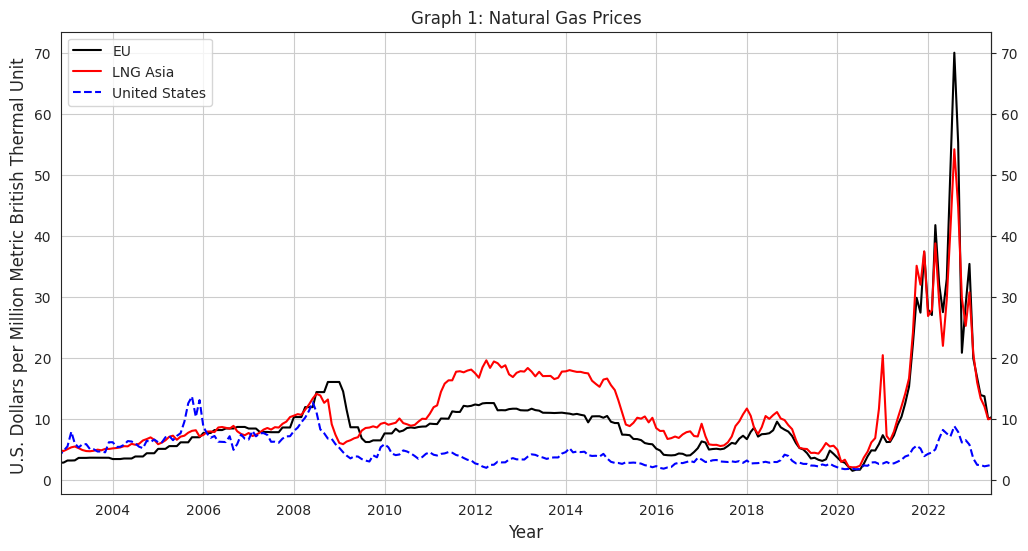

In [21]:
#Natural Gas
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot()

ax.plot(EU_NG, lw=1.5,color='black')
ax.plot(LNG_ASIA, lw=1.5,color='red')
ax.plot(US_NG, lw=1.5,linestyle='dashed',color='blue')


ax.set_title('Graph 1: Natural Gas Prices')
plt.legend(labels=['EU','LNG Asia','United States'])
plt.grid()

ax.set_xlim([12000, 19500])

ax.secondary_yaxis("right")
ax.set_xlabel(xlabel='Year', size=12)
ax.set_ylabel(ylabel='U.S. Dollars per Million Metric British Thermal Unit ', size=12)

The Russo-Ukrainian War (https://en.wikipedia.org/wiki/Russo-Ukrainian_War) and the subsequent sanctions on Russia resulted in a supply shock for natural gas in Europe. The above chart shows how this shock has increased natural gas prices Europe. While liquid natural gas (LNG) in Asia has also risen, likely due to increased European imports. Natural gas prices in the United States have also increased, but not to the same extent.

# Oil and All Commodities


Text(0.5, 0, 'Year')

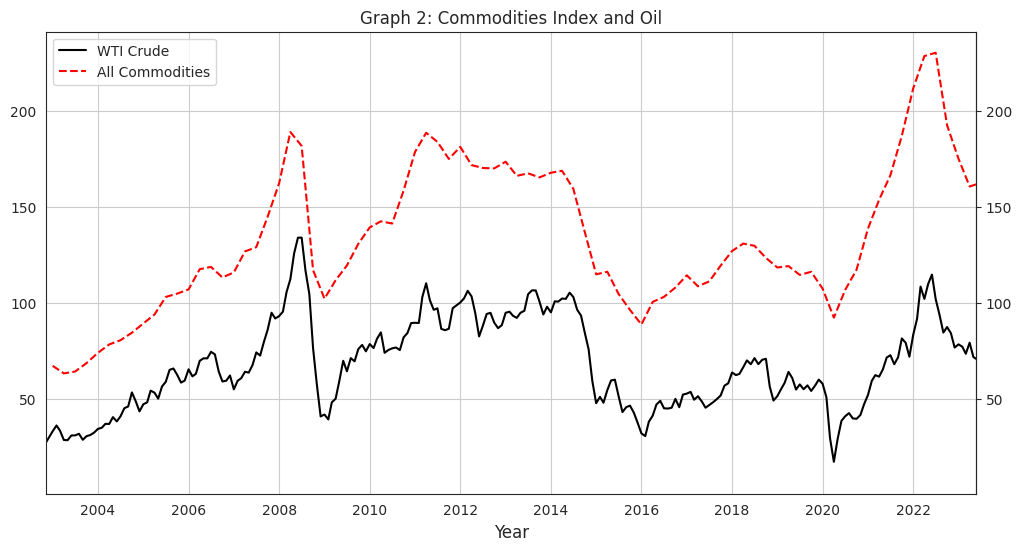

In [22]:
#Oil

#Global price of WTI Crude (POILWTIUSDM)
GP_OIL=fred.get_series(series_id='POILWTIUSDM')

# Global Price Index of All Commodities (PALLFNFINDEXQ)
COM_IND=fred.get_series(series_id='PALLFNFINDEXQ')

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot()

ax.plot(GP_OIL, lw=1.5,color='black')
ax.plot(COM_IND, lw=1.5,linestyle='dashed',color='red')


ax.set_title('Graph 2: Commodities Index and Oil')
plt.legend(labels=['WTI Crude','All Commodities'])

plt.grid()
ax.set_xlim([12000, 19500])

ax.secondary_yaxis("right")
ax.set_xlabel(xlabel='Year', size=12)

The above graph shows the West Texas Intermediate (WTI) price per barrel in US dollars and an index of all commodities. What is clear is that the two tend to move together. Also evident is that the current trend of increasing oil and commodity prices predated the start of the Russo-Ukrainian War. The war also did not increase the price of oil to the same extent of natural gas, despite Russia being the world's second largest oil exporter (https://en.wikipedia.org/wiki/List_of_countries_by_oil_exports). My guess is that the natural gas exports require a greater degree of fixed infrastructure, which makes it harder to change markets such as replacing the gas pipelines to Europe. While exporting oil requires a different type of infrastructure, making it easier to change markets. Thus, Europe reducing imports from Russia was not as great of a supply shock to the world economy.

The recent decline in the oil price could be a hint that overall commodity prices have peaked. Note that the commodities timeseries is based on quarterly periods, while the oil price is based off months.

# Food Prices

In [23]:
#Importing Food Prices
#Global price of Food index (PFOODINDEXM)
FOOD=fred.get_series(series_id='PFOODINDEXM')

#Global price of Wheat (PWHEAMTUSDM)
WHEAT=fred.get_series(series_id='PWHEAMTUSDM')

#Global price of Barley (PBARLUSDM)
BARLEY=fred.get_series(series_id='PBARLUSDM')

#Global price of Corn (PMAIZMTUSDM)
CORN=fred.get_series(series_id='PMAIZMTUSDM')


#Indexing for year "2000-01-01" == 100
FOOD=(FOOD/58)*100
WHEAT=(WHEAT/93)*100
BARLEY=(BARLEY/73)*100
CORN=(CORN/92)*100

Text(0, 0.5, 'Index 2000-01=100 ')

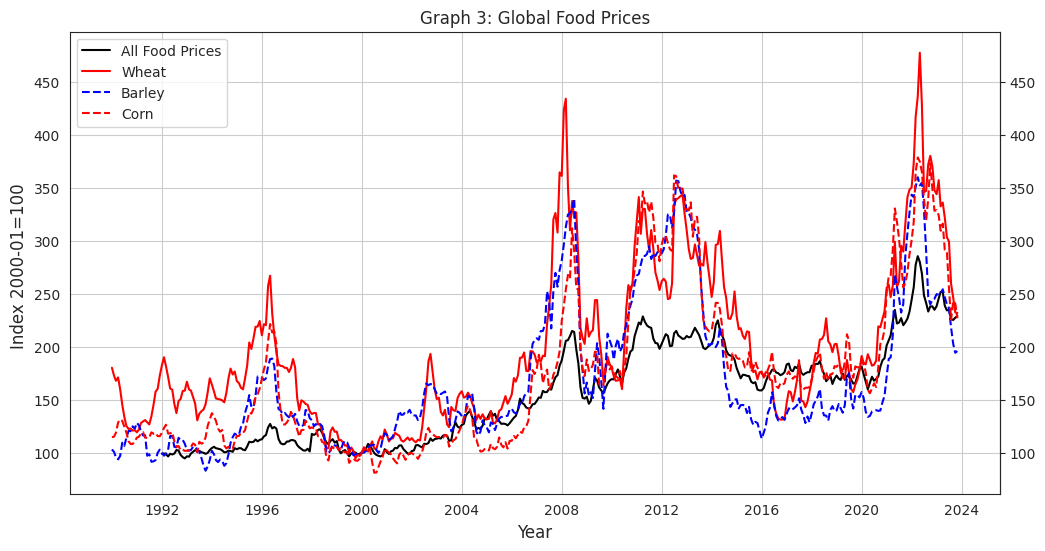

In [24]:
#Food Prices
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot()

ax.plot(FOOD, lw=1.5,color='black')
ax.plot(WHEAT, lw=1.5,color='red')
ax.plot(BARLEY, lw=1.5,linestyle='dashed',color='blue')
ax.plot(CORN, lw=1.5,linestyle='dashed',color='red')

ax.set_title('Graph 3: Global Food Prices')
plt.legend(labels=['All Food Prices','Wheat','Barley','Corn'])

plt.grid()
ax.secondary_yaxis("right")
ax.set_xlabel(xlabel='Year', size=12)
ax.set_ylabel(ylabel='Index 2000-01=100 ', size=12)


Increases in the cost of natural gas and oil could affect food prices directly by increasing the cost of fertiliser and transport. It could also be a signal of too much demand in the economy, something I will mention again later. While global food prices have seen their greatest increase since 2008 and 2012, there has been recent decline in this trend after April. A possible signal of a global decline in demand?

# Metal and Coal

In [26]:
#Global price of Metal index (PMETAINDEXM)
METAL=fred.get_series(series_id='PMETAINDEXM')

#Global price of Coal, Australia (PCOALAUUSDM)
COAL=fred.get_series(series_id='PCOALAUUSDM')

#Global price of Copper (PCOPPUSDM)
COPPER=fred.get_series(series_id='PCOPPUSDM')

#Global price of Rubber (PRUBBUSDM)
RUBBER=fred.get_series(series_id='PBARLUSDM')

#Global price of Iron Ore (PIORECRUSDM)
IRON=fred.get_series(series_id='PIORECRUSDM')

# Global price of Aluminum (PALUMUSDM)
ALUM=fred.get_series(series_id='PALUMUSDM')


#Indexing for year "2000-01-01" == 100
METAL=(METAL/49)*100
COAL=(COAL/25)*100
COPPER=(COPPER/1843)*100
RUBBER=(RUBBER/73)*100
IRON=(IRON/12)*100
ALUM=(ALUM/1679)*100

Text(0, 0.5, 'Index 2000-01=100 ')

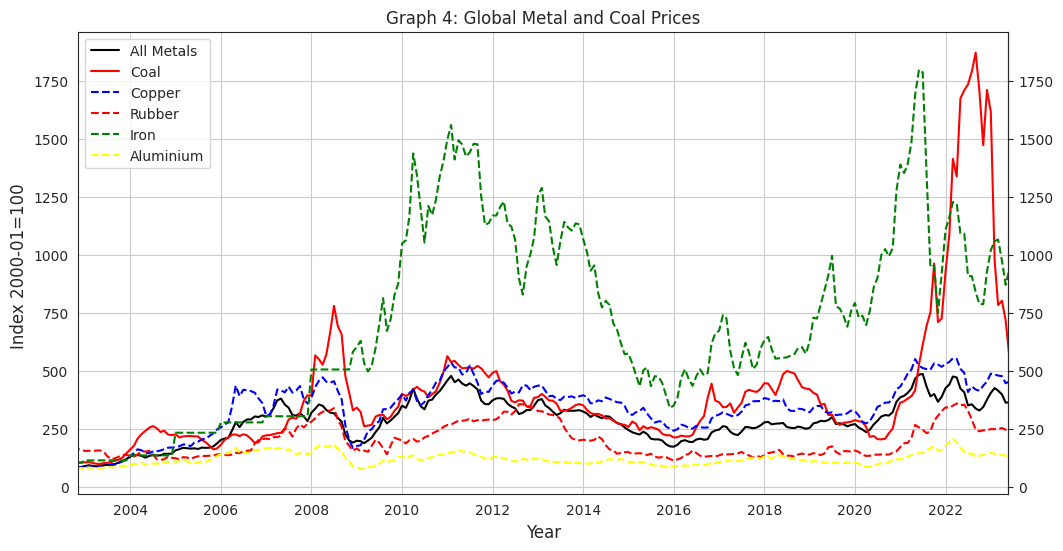

In [27]:
#Metal Prices
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot()

ax.plot(METAL, lw=1.5,color='black')
ax.plot(COAL, lw=1.5,color='red')
ax.plot(COPPER, lw=1.5,linestyle='dashed',color='blue')
ax.plot(RUBBER, lw=1.5,linestyle='dashed',color='red')
ax.plot(IRON, lw=1.5,linestyle='dashed',color='green')
ax.plot(ALUM, lw=1.5,linestyle='dashed',color='yellow')

ax.set_title('Graph 4: Global Metal and Coal Prices')
plt.legend(labels=['All Metals','Coal','Copper','Rubber','Iron','Aluminium'])


plt.grid()
ax.set_xlim([12000, 19500])

ax.secondary_yaxis("right")
ax.set_xlabel(xlabel='Year', size=12)
ax.set_ylabel(ylabel='Index 2000-01=100 ', size=12)

The prices for metals supports the idea that that the increase in commodity prices predating the war was likely driven by too much demand, which has possibly recently decreased.

The chart shows that Iron prices peaked in the middle of 2021 and has dramatically declined after. The general trend of prices for Metals is an increase in 2021 and a decline for most of 2022. Coal is an interesting exception to this trend. It rapidly increased in 2021 and has increased further in 2022. This is likely related to the Russo-Ukrainian War. As European countries have been cut off from Russian natural gas, coal has been used alternative, which has increased its price.

# Inflation in Europe and the United States


In [32]:
#Obtaining and Transforming data for producer inflation

#Producer Prices Index: Economic Activities: Industrial Activities: Total for Germany
GER_PPI=fred.get_series(series_id='PIEATI01DEM661N')
GER_PPI=GER_PPI.to_frame(name='PPI')
GER_PPI=((GER_PPI-GER_PPI.shift(12))/GER_PPI.shift(12))*100


#Producer Prices Index: Economic Activities: Industrial Activities: Total for the Euro Area (19 Countries)
#PIEATI01EZM661N
EURO_PPI=fred.get_series(series_id='PIEATI01EZM661N')
EURO_PPI=EURO_PPI.to_frame(name='PPI')
EURO_PPI=((EURO_PPI-EURO_PPI.shift(12))/EURO_PPI.shift(12))*100

#Producer Prices Index: Economic activities: Industrial activities: Total for Poland (Growth)
#POLPIEATI01GYM
POL_PPI=fred.get_series(series_id='POLPIEATI01GYM')
POL_PPI=POL_PPI.to_frame(name='PPI')

#Producer Price Index by Industry: Total Manufacturing Industries US
#PCUOMFGOMFG
US_PPI=fred.get_series(series_id='PCUOMFGOMFG')
US_PPI=US_PPI.to_frame(name='PPI')
US_PPI=((US_PPI-US_PPI.shift(12))/US_PPI.shift(12))*100

#Producer Prices Index: Economic Activities: Total Industrial Activities for the United Kingdom
#PIEATI01GBM661N
UK_PPI=fred.get_series(series_id='PIEATI01GBM661N')
UK_PPI=UK_PPI.to_frame(name='PPI')
UK_PPI=((UK_PPI-UK_PPI.shift(12))/UK_PPI.shift(12))*100

In [33]:
#Obtaining 2% inflation target
US_inf_targ=US_PPI
US_inf_targ['Inflation_Target'] =2
From = '1990-01-01'
#Date chosen given that inflation targeting was first attempted by New Zealand around this date.
df_Z = US_inf_targ.loc[From:,:]

#Drop variables to each dataframe.
df_Z = df_Z.drop ('PPI',axis=1)
US_PPI = US_PPI.drop ('Inflation_Target',axis=1)

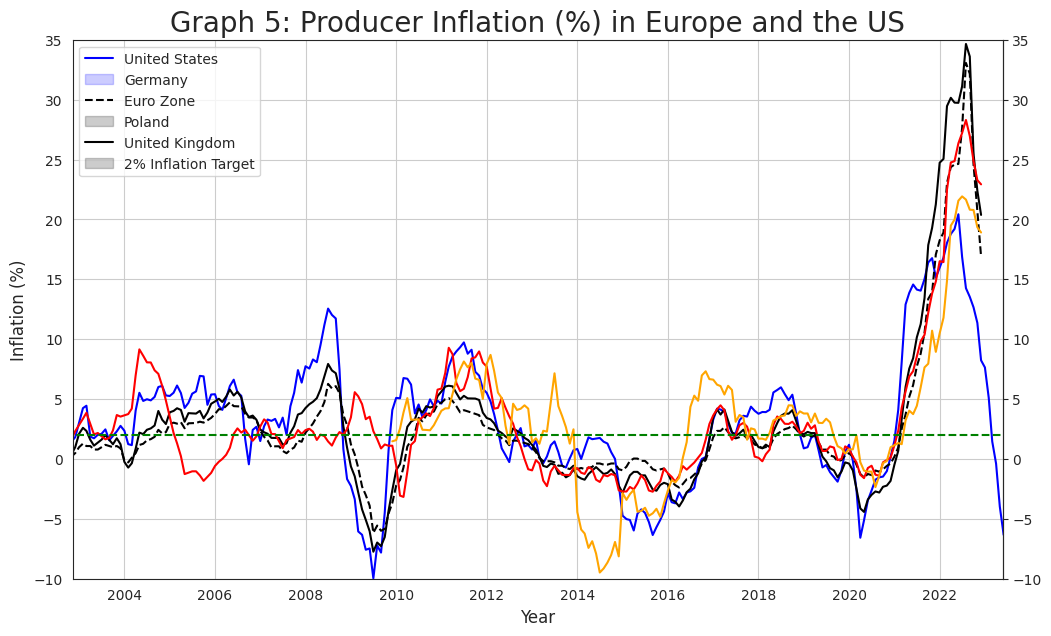

In [35]:
#Producer Inflation in advanced economies 
plt.figure(figsize=(12,7))
ax = sns.lineplot(data=US_PPI, x=US_PPI.index, y=US_PPI['PPI'],color='blue')
ax = sns.lineplot(data=GER_PPI, x=GER_PPI.index, y=GER_PPI['PPI'],linestyle='dashed',color='black')
ax = sns.lineplot(data=EURO_PPI, x=EURO_PPI.index, y=EURO_PPI['PPI'],color='black')
ax = sns.lineplot(data=POL_PPI, x=POL_PPI.index, y=POL_PPI['PPI'],color='red')
ax = sns.lineplot(data=UK_PPI, x=UK_PPI.index, y=UK_PPI['PPI'],color='orange')
ax = sns.lineplot(data=df_Z, x=df_Z.index, linestyle = 'dashed', y=df_Z['Inflation_Target'],color='green')
plt.legend(labels=[ 'United States','Germany','Euro Zone','Poland','United Kingdom', '2% Inflation Target',])

ax.set_ylim(bottom=-10, top=35)
ax.set_xlabel(xlabel='Year', size=12)
ax.set_ylabel(ylabel='Inflation (%)', size=12)
ax.set_title('Graph 5: Producer Inflation (%) in Europe and the US', size=20)
ax.secondary_yaxis("right")
ax.set_xlim([12000, 19500])
plt.grid()

Producer price inflation, which measures the change in the price level for product manufacturers or service suppliers, has increased by a large amount in Europe. Natural gas is an important manufacturing input for multiple industries. Thus, the recent increase in natural gas prices has contributed to increased overall production costs.

The most recent German PPI data shows that it has increased to 45.8% in September(https://www.investing.com/economic-calendar/german-ppi-739). This increase is concerning for Europe due to Germany's role as Europe's industrial core. Producer inflation in the United States increased earlier than Europe and is now showing a downward trend.

In [30]:
GER_PPI=fred.get_series(series_id='FPCPITOTLZGIND')

print(GER_PPI)

#Series ID - India "FPCPITOTLZGIND"


1960-01-01     1.779878
1961-01-01     1.695213
1962-01-01     3.632215
1963-01-01     2.946161
1964-01-01    13.355261
                ...    
2018-01-01     3.938826
2019-01-01     3.729506
2020-01-01     6.623437
2021-01-01     5.131407
2022-01-01     6.699034
Length: 63, dtype: float64
